In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sb

In [3]:
start_year = 1980

countries_and_codes_path = "data_exports/countries_and_codes_20Countries.csv"
countries_and_codes_data = pd.read_csv(countries_and_codes_path)
countries_and_codes_df = pd.DataFrame(countries_and_codes_data)
countries_and_codes_df

,country,country_code
0,Belgium,BEL
1,Canada,CAN
2,China,CHN
3,Denmark,DNK
4,Estonia,EST
5,Finland,FIN
6,France,FRA
7,Germany,DEU
8,Ireland,IRL
9,Israel,ISR


In [4]:
# File to Load (Remember to change these)
#OECD_spend_govt_compulsory_filepath = "data_sources/OECD_healthcare_spend_govt-compulsory_dollars_per_capita_1980.csv"
OECD_spend_govt_compulsory_filepath = "data_sources/OECD_healthcare_spend_total_dollars_per_capita.csv"

# Read in the data from the CSV
OECD_spend_govt_compulsory_data = pd.read_csv(OECD_spend_govt_compulsory_filepath)

# convert data to a DataFrame
OECD_spend_govt_compulsory_df_raw = pd.DataFrame(OECD_spend_govt_compulsory_data)
OECD_spend_govt_compulsory_df = OECD_spend_govt_compulsory_df_raw.rename(columns={"LOCATION":"code",
                                                                                 "TIME":"year",
                                                                                 "Value":"spend"})
#OWID_life_expectancy_df.head()
OECD_spend_govt_compulsory_df.head()


,code,INDICATOR,SUBJECT,MEASURE,FREQUENCY,year,spend,Flag Codes
0,AUS,HEALTHEXP,TOT,USD_CAP,A,1980,614.678,NaN
1,AUS,HEALTHEXP,TOT,USD_CAP,A,1981,696.422,NaN
2,AUS,HEALTHEXP,TOT,USD_CAP,A,1982,730.500,NaN
3,AUS,HEALTHEXP,TOT,USD_CAP,A,1983,771.792,NaN
4,AUS,HEALTHEXP,TOT,USD_CAP,A,1984,816.866,NaN


In [5]:
country_year_spend = OECD_spend_govt_compulsory_df.loc[(OECD_spend_govt_compulsory_df["code"].isin(countries_and_codes_df["country_code"]))
                                                              & (OECD_spend_govt_compulsory_df["year"] >= start_year)
                                                              ,["code","year","spend"]]


# Check to see that all the countries are in this list
countries_and_codes_df["country_code"].isin(country_year_spend["code"].unique())

country_year_spend.head()








,code,year,spend
76,BEL,1980,635.390
77,BEL,1981,739.290
78,BEL,1982,817.406
79,BEL,1983,873.266
80,BEL,1984,905.573


<IPython.core.display.Javascript object>


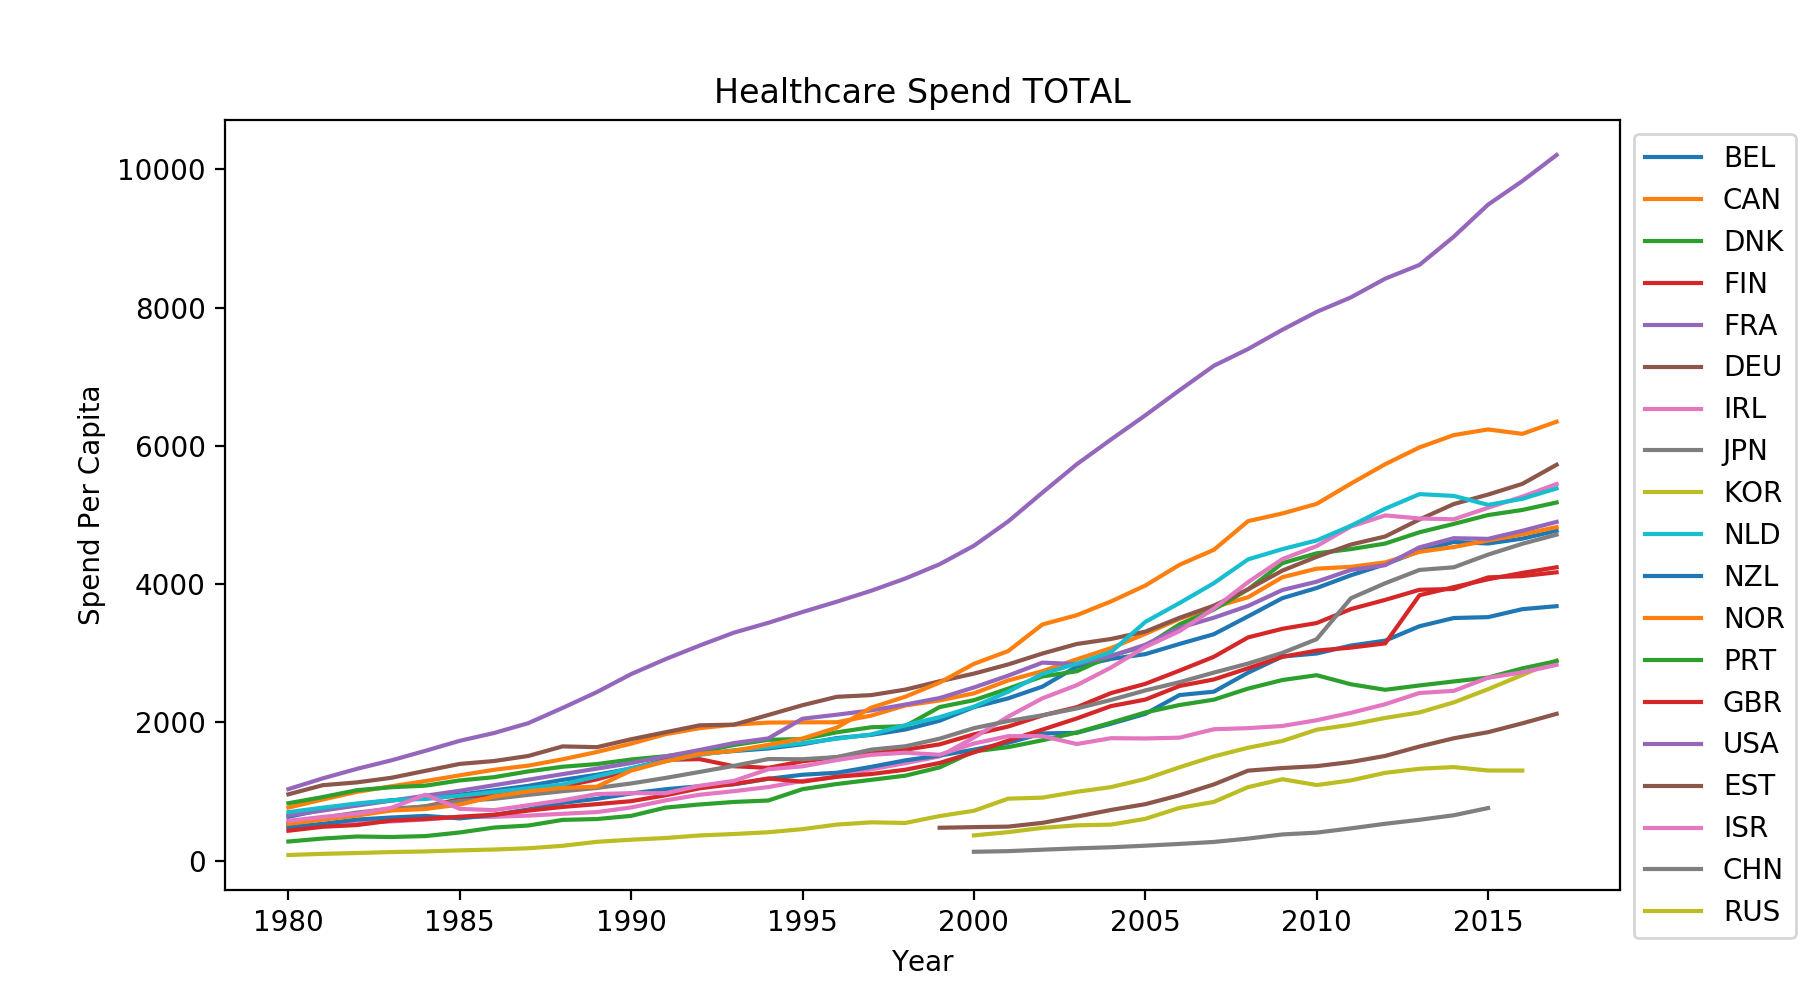

In [6]:
fig2, ax2 = plt.subplots(figsize=(9,5))

#fig2. = (5, 8)

for country in country_year_spend["code"].unique():
    year = country_year_spend.loc[country_year_spend["code"] == country,["year"]]
    spend = country_year_spend.loc[country_year_spend["code"] == country,["spend"]]
    ax2.plot(year, spend["spend"], label=country)

#ax2.plot(x_axis_from_year_specified, world_subset_life_expectancy["Life expectancy"], label="World", linestyle='dashed', linewidth=2)



ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
#ax2.legend(loc="best")

plt.title("Healthcare Spend TOTAL")
plt.xlabel("Year")
plt.ylabel("Spend Per Capita")

#fig2.savefig("./Images/OECD_healthcare_spend_total.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

#fig2.savefig("./Images/OECD_healthcare_spend_total.png")

fig2.savefig("./Images/OECD_healthcare_spend_total_2.png", 
                 dpi=200, 
                 #transparent=True, 
                 quality=95)


In [14]:
# Save path to store output file set in a variable
#csv_output = "data_exports/CLEAN_healthcare_spending_20Countries.csv"
csv_output = "data_exports/CLEAN_healthcare_spending_govt_compulsory_20Countries.csv"

# Export file as a CSV, without the Pandas index, 
# but with the header
country_year_spend.to_csv(csv_output, index=False, header=True)

In [18]:
country_year_spend.loc[country_year_spend["code"] == "USA",["year"]]

,year
995,1980
996,1981
997,1982
998,1983
999,1984
1000,1985
1001,1986
1002,1987
1003,1988
1004,1989
